# CAR PRICE PREDICTION

#### Introduction: An Overview

In this Project, we are going to predict the Price of Used Cars using various features like Present_Price, Selling_Price, Kms_Driven, Fuel_Type, Year etc.

#### To be able to predict used cars market value can help both buyers and sellers.

There are lots of individuals who are interested in the used car market at some points in their life because they wanted to sell their car or buy a used car. In this process, it’s a big corner to pay too much or sell less then it’s market value.

## Acknowledgements

This public dataset can be found on this https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#scoring and tuning 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Data Selection

In [2]:
# loading the data from csv file to pandas dataframe
df = pd.read_csv('car data.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Data Preprocessing

##### Exploring the descriptive statistics of the variables

In [5]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [6]:
# checking the number of rows and columns
df.shape

(301, 9)

In [7]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# checking missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

##### No single null values are present.

## Feature Extraction

In [9]:
# Creating a new feature called Age of car
df['Car_age'] = 2020-df['Year']

#dropping the Year column after the needed info is derived.
df.drop(labels='Year',axis=1,inplace=True)

In [10]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [11]:
df.tail()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
296,city,9.50,11.6,33988,Diesel,Dealer,Manual,0,4
297,brio,4.00,5.9,60000,Petrol,Dealer,Manual,0,5
298,city,3.35,11.0,87934,Petrol,Dealer,Manual,0,11
299,city,11.50,12.5,9000,Diesel,Dealer,Manual,0,3
300,brio,5.30,5.9,5464,Petrol,Dealer,Manual,0,4


# Exploratory Data Analysis

#### Data Exploration & Visualization

<Axes: ylabel='Fuel_Type'>

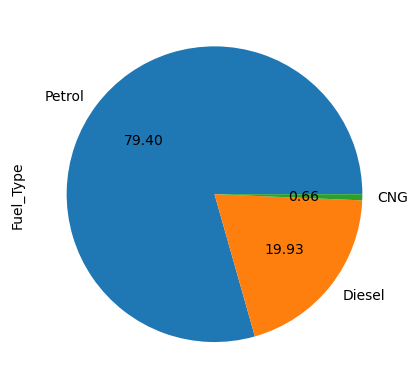

In [12]:
df['Fuel_Type'].value_counts().plot(kind='pie',autopct='%.2f')

In [13]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

<Axes: ylabel='Selling_type'>

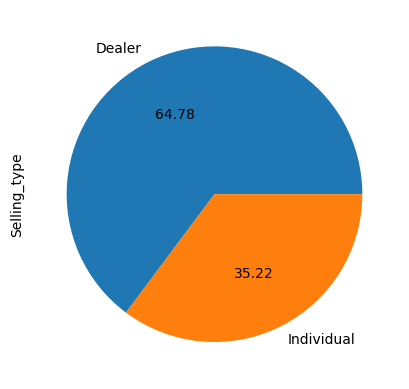

In [14]:
df['Selling_type'].value_counts().plot(kind='pie',autopct='%.2f')

In [15]:
df['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

<Axes: ylabel='Transmission'>

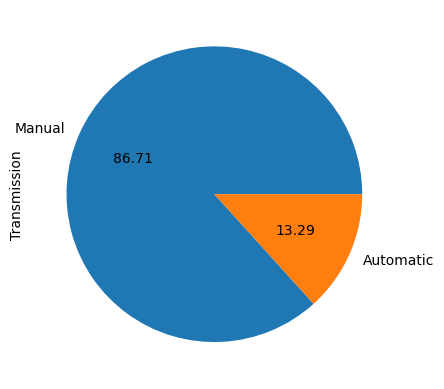

In [16]:
df['Transmission'].value_counts().plot(kind='pie',autopct='%.2f')

In [17]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

<Axes: ylabel='Owner'>

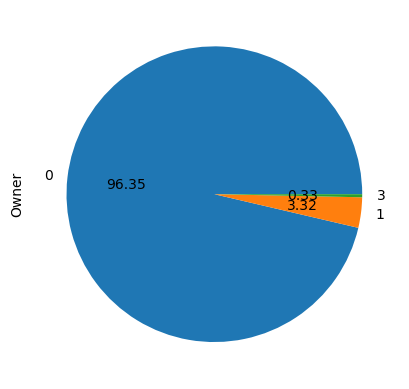

In [18]:
df['Owner'].value_counts().plot(kind='pie',autopct='%.2f')

In [19]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

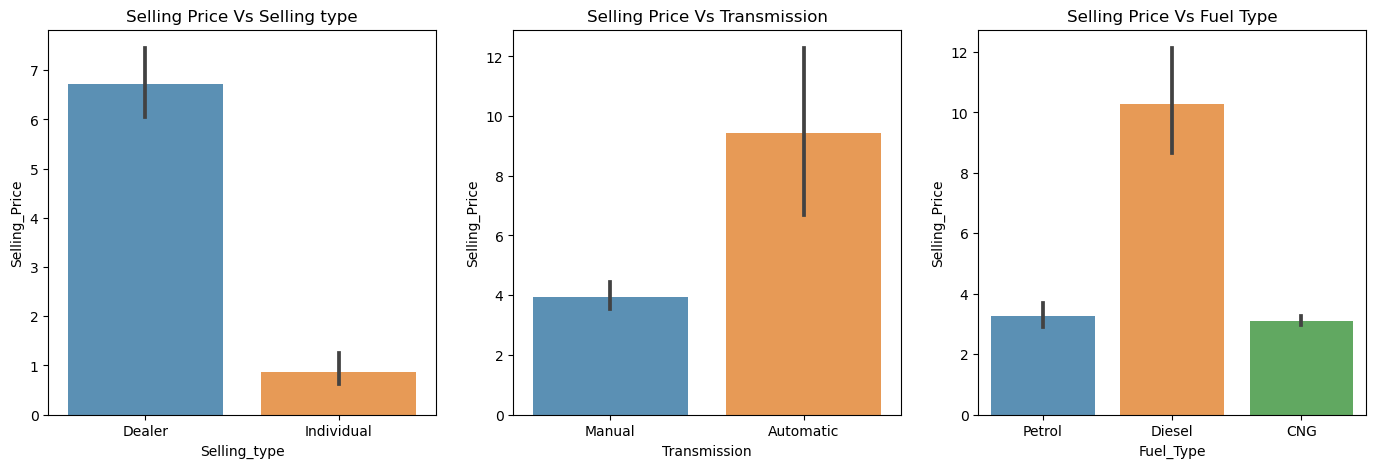

In [20]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x=df.Selling_type, y=df.Selling_Price, alpha=0.8)
plt.title('Selling Price Vs Selling type')

plt.subplot(1,3,2)
sns.barplot(x=df.Transmission, y=df.Selling_Price, alpha=0.8)
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x=df.Fuel_Type, y=df.Selling_Price, alpha=0.8)
plt.title('Selling Price Vs Fuel Type')

plt.show()

##### Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals *
##### It can be observed that Selling Price would be higher for cars that are Automatic. *
##### Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG *

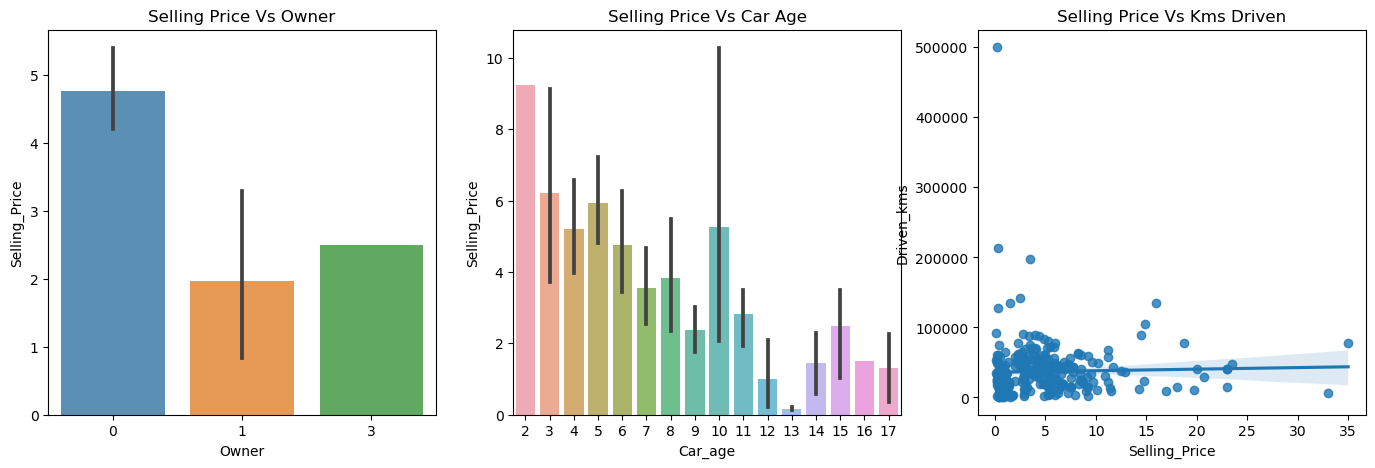

In [21]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x=df.Owner, y=df.Selling_Price, alpha=0.8)
plt.title('Selling Price Vs Owner')

plt.subplot(1,3,2)
sns.barplot(x=df.Car_age, y=df.Selling_Price, alpha=0.8)
plt.title('Selling Price Vs Car Age')

plt.subplot(1,3,3)
sns.regplot(x=df.Selling_Price, y=df.Driven_kms)
plt.title('Selling Price Vs Kms Driven')

plt.show()

##### Selling Price is high with less Owners used Cars *
##### Selling Price of cars 2 years old would be high and gradually decreases with car of 17 years old *
##### Lesser the Kms driven higher the Selling Price *

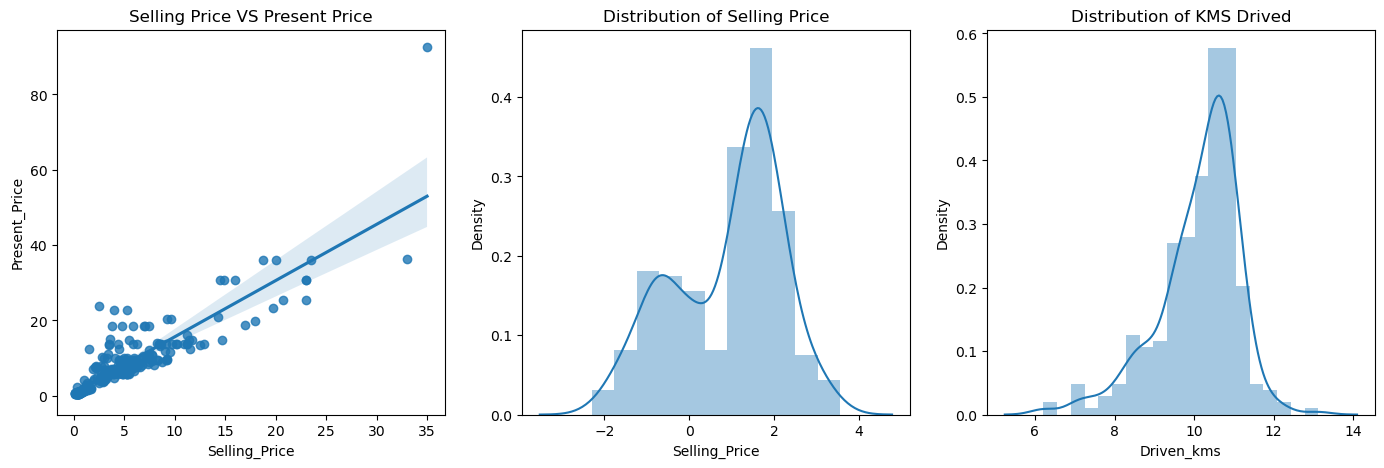

In [22]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(x=df.Selling_Price, y=df.Present_Price)
plt.title('Selling Price VS Present Price')

plt.subplot(1,3,2)
sns.distplot(np.log(df['Selling_Price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sns.distplot(np.log(df['Driven_kms']))
plt.title('Distribution of KMS Drived')

plt.show()

##### Selling Price tends to increase with increase in the Present Price of cars. *

#### Dealing With Categorical Variables Columns

In [23]:
# categorical columns
print(df['Fuel_Type'].unique())
print(df['Selling_type'].unique())
print(df['Transmission'].unique())
print(df['Car_Name'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [24]:
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
df = df.drop(labels='Car_Name', axis=1)

In [25]:
# Dealing With Categorical Variables, creagting dummie
clean_data = pd.get_dummies(df,drop_first=True)
clean_data.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


# Checking Multicollinearity Using VIF

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Driven_kms','Owner','Car_age','Fuel_Type_Diesel',
                        'Fuel_Type_Petrol','Selling_type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.202741,Present_Price
1,2.892078,Driven_kms
2,1.088004,Owner
3,8.539550,Car_age
4,4.716771,Fuel_Type_Diesel
5,13.346453,Fuel_Type_Petrol
6,2.230376,Selling_type_Individual
7,8.369079,Transmission_Manual


In [27]:
# Car_age nd fuel_type_petrol feature has high VIF
data_no_multicolinearity = clean_data.drop(['Driven_kms','Fuel_Type_Petrol'],axis=1)

In [28]:
# cheking again after removing some correlated feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Owner','Car_age','Fuel_Type_Diesel',
                        'Selling_type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.456803,Present_Price
1,1.084146,Owner
2,4.809303,Car_age
3,1.658171,Fuel_Type_Diesel
4,1.864419,Selling_type_Individual
5,3.965002,Transmission_Manual


##### We have VIF < 5 and hence there is no Multicollinearity occurrence in our model.

# Feature Selection

<Axes: >

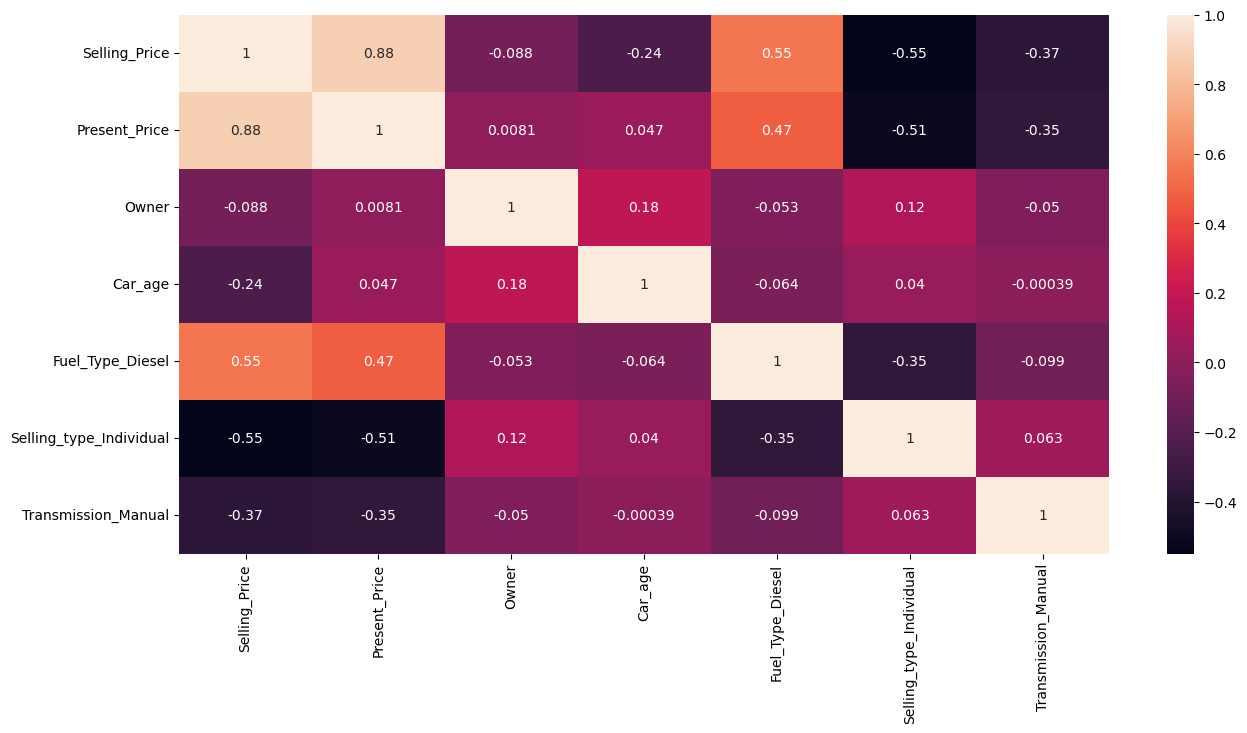

In [29]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

##### *P-Value* - P values are one of the best ways to determine if a variable is necessary or not but they provide no information.

##### If a variable has a p-values >0.05, we can ignore it.

In [30]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method

array([0.   , 0.126, 0.   , 0.   , 0.   , 0.   ])

In [31]:
# Creating summary table
model_summry = pd.DataFrame(data=['Present_Price', 'Owner', 'Car_age', 'Fuel_Type_Diesel',
                              'Selling_type_Individual', 'Transmission_Manual'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head()

,Features,p-values
0,Present_Price,0.000
1,Owner,0.126
2,Car_age,0.000
3,Fuel_Type_Diesel,0.000
4,Selling_type_Individual,0.000


Dropping the "Owner" feature which has p-value>0.05 resulting in insigificant. It means that Owner variable is not contributing that much in target variable




### Feature Importance
Feature importance gives a score for each feature of data, the higher the score more important or relevant is the feature towards our Target variable.

In [32]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

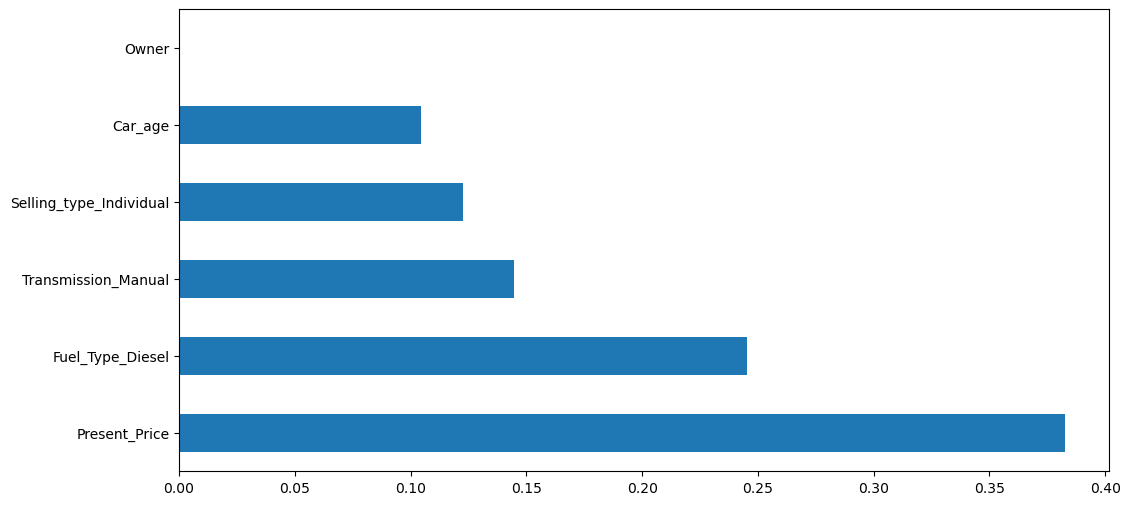

In [33]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [34]:
print(feat_importances.sort_values(ascending=False))

Present_Price              0.382566
Fuel_Type_Diesel           0.245150
Transmission_Manual        0.144702
Selling_type_Individual    0.122478
Car_age                    0.104600
Owner                      0.000503
dtype: float64


In [35]:
data_no_multicolinearity.columns

Index(['Selling_Price', 'Present_Price', 'Owner', 'Car_age',
       'Fuel_Type_Diesel', 'Selling_type_Individual', 'Transmission_Manual'],
      dtype='object')

In [36]:
# Selecting useful features.
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price', 'Car_age',
       'Fuel_Type_Diesel', 'Selling_type_Individual', 'Transmission_Manual']]

In [37]:
final_df.head()

,Selling_Price,Present_Price,Car_age,Fuel_Type_Diesel,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,6,0,0,1
1,4.75,9.54,7,1,0,1
2,7.25,9.85,3,0,0,1
3,2.85,4.15,9,0,0,1
4,4.60,6.87,6,1,0,1


# Model Development

In [38]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

#### Feature Scaling

In [39]:
# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Car_age']])

StandardScaler()

In [40]:
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [41]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

### Training and Testing Data

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

## Linear Regression Model

In [43]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
mean_sqare_E =mean_squared_error(y_test,lr.predict(x_test))
mean_abso_E =mean_absolute_error(y_test,lr.predict(x_test))
print("R_squared :",r_squared,"\n")
print("RMSE :",rmse,"\n")
print("MSE :",mean_sqare_E,"\n")
print("MAE :",mean_abso_E,"\n")

R_squared : 0.8406852328957864 

RMSE : 2.6776837920733283 

MSE : 7.169990490332199 

MAE : 1.6204398961692437 



## Random Forest Model

In [44]:
#Model Building
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
mean_sqare_E =mean_squared_error(y_test,lr.predict(x_test))
mean_abso_E =mean_absolute_error(y_test,lr.predict(x_test))
print("R_squared :",r_squared,"\n")
print("RMSE :",rmse,"\n")
print("MSE :",mean_sqare_E,"\n")
print("MAE :",mean_abso_E,"\n")

R_squared : 0.9092220084315129 

RMSE : 2.0212570991640613 

MSE : 7.169990490332199 

MAE : 1.6204398961692437 



## KNN Model

In [45]:

knn = KNeighborsRegressor()

# Training Model
knn.fit(x_train,y_train)

# Model Summary
y_pred_knn = knn.predict(x_test)

r_squared = r2_score(y_test,y_pred_knn)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_knn))
mean_sqare_E =mean_squared_error(y_test,lr.predict(x_test))
mean_abso_E =mean_absolute_error(y_test,lr.predict(x_test))
print("R_squared :",r_squared,"\n")
print("RMSE :",rmse,"\n")
print("MSE :",mean_sqare_E,"\n")
print("MAE :",mean_abso_E,"\n")

R_squared : 0.8737569009487871 

RMSE : 2.383609440997647 

MSE : 7.169990490332199 

MAE : 1.6204398961692437 



#### So as we try diferent Regression Alorithms and found that "Random Forest Regressor Model" is giving better accuracy compare to other.

# Hyperparameter optimization

In [46]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [48]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [49]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [50]:
predictions=rf_random.predict(x_test)

In [51]:
r_squared = r2_score(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("R_squared :",r_squared)

R_squared : 0.8111338199915797


# Test the model by giving input

In [52]:
def prediction(PresentPrice, CarAge, FuelType, SellerType, TransmissionManual):
    # feature scaling on present price and car age
    scaled_value = scaler.transform([[float(PresentPrice), int(CarAge)]])
    
    price = scaled_value[0,0]
    age = scaled_value[0,1]
    
    fuel = int(FuelType)
    Seller = int(SellerType)
    trans = int(TransmissionManual)
    
    return rf_random.predict([[price, age, fuel, Seller, trans]])

In [53]:
prediction(15, 10, 1, 1, 0)

array([8.24203417])

In [54]:
prediction(23.73, 14, 0, 1,0)

array([4.89368333])

## Conclusions:
##### Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
##### Car age is effecting negatively as older the car lesser the Selling Price.
##### Selling Price of cars with Fuel type Diesel is higher.
##### Car of Manual type is of less priced whereas of Automatic type is high.
##### Cars sold by Individual tend to get less Selling Price when sold by Dealers.